# Machine Learning
Neste projeto, iremos utilizar uma base de dados de estudantes utilizando as notas do exame SAT para prever a nota GPA. 
* SAT: exame aplicado aos estudantes, como se fosse um vestibular/enem
* GPA: média ponderada das notas das disciplinas do ensino médio
Será utilizado o modelo de regressão, segundo o Pipeline:

1. Coleta de dados
2. Limpeza e preparação dos dados
3. Divisão em treino e teste
4. Treinamento do modelo
5. Avaliação do modelo
6. Interpretação ou uso do modelo

In [1]:
# importação de bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

# bibliotecas para regressão linear
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Coleta dos dados

In [2]:
# leitura dos arquivo csv
df = pd.read_csv('Simple linear regression.csv')
df.shape

(100, 2)

In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
df.tail()

,SAT,GPA
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59
99,1778,3.59


## 2. Limpeza e Preparação dos dados
* Apenas valores numéricos: boxplot, histograma e verificação de nulos

### Verificação de nulos

In [5]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

### SAT

In [6]:
# resumo estatístico
df['SAT'].describe()

count     100.000000
mean     1850.760000
std       101.566331
min      1634.000000
25%      1776.500000
50%      1850.000000
75%      1934.000000
max      2050.000000
Name: SAT, dtype: float64

Text(0.5, 1.0, 'Valores de SAT')

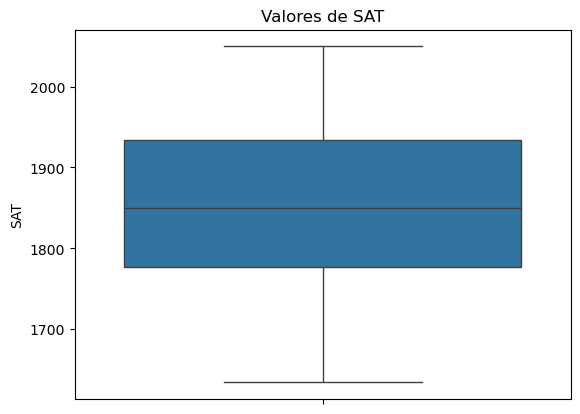

In [7]:
# verificar outliers
srn.boxplot(df['SAT']).set_title('Valores de SAT')

Text(0.5, 1.0, 'SAT')

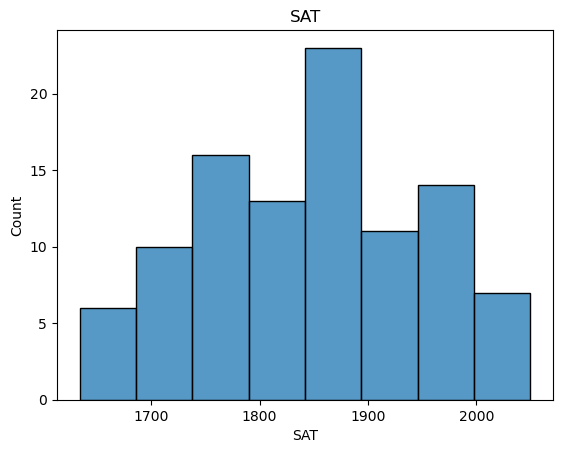

In [8]:
#histograma para verificar a distribuição de frequencias
srn.histplot(df['SAT']).set_title('SAT')

### GPA

In [9]:
#resumo estatístico
df['GPA'].describe()

count    100.000000
mean       3.360500
std        0.258845
min        2.400000
25%        3.270000
50%        3.410000
75%        3.520000
max        3.810000
Name: GPA, dtype: float64

Text(0.5, 1.0, 'Valores de GPA')

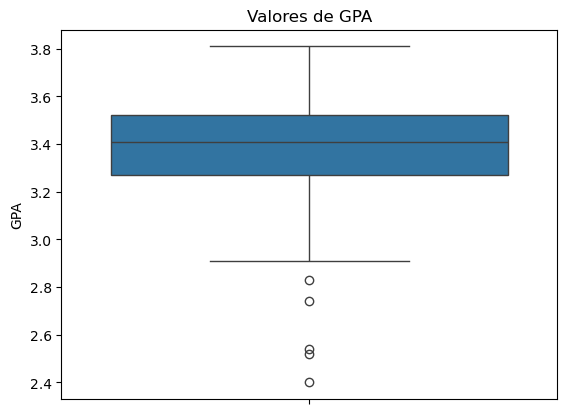

In [10]:
#boxplot
srn.boxplot(df['GPA']).set_title('Valores de GPA')

Text(0.5, 1.0, 'Distribuição das notas de GPA')

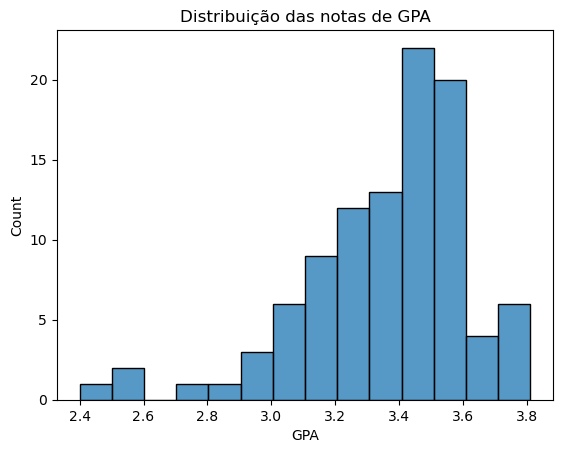

In [11]:
#histograma
srn.histplot(df['GPA']).set_title('Distribuição das notas de GPA')

In [12]:
#Calculando os limites para tratar os outliers
q1 = 3.27
q3 = 3.52
iq = q3 - q1

lim_inf = q1 - 1.5 * iq
lim_sup = q3 + 1.5 * iq

print('Limite inferior: ', lim_inf)
print('Limite Superior: ', lim_sup)

Limite inferior:  2.895
Limite Superior:  3.895


In [13]:
# calculando a mediana
mediana_gpa = sts.median(df['GPA'])
mediana_gpa

3.41

In [14]:
# Substituindo os outliers pela mediana
df.loc[(df['GPA'] < lim_inf) | (df['GPA'] > lim_sup), 'GPA'] = mediana_gpa

In [15]:
# verificando se ainda existem outliers
df.loc[(df['GPA'] < lim_inf) | (df['GPA'] > lim_sup)]

,SAT,GPA
